In [ ]:
import torch
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from  transformers import pipeline
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
classifier=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
!wget -nc https://www.lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-06-18 13:20:18--  https://www.lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving www.lazyprogrammer.me (www.lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to www.lazyprogrammer.me (www.lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lazyprogrammer.me/course_files/AirlineTweets.csv [following]
--2023-06-18 13:20:18--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  75.7KB/s    in 40s     

2023-06-18 13:21:05 (83.0 KB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [ ]:
!ls

AirlineTweets.csv  sample_data


In [ ]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [ ]:
classifier('this is a great movie')

[{'label': 'POSITIVE', 'score': 0.9998798370361328}]

In [ ]:
classifier('this movie is not so satisfying')

[{'label': 'NEGATIVE', 'score': 0.9997816681861877}]

In [ ]:
classifier('the movie is average in rating in my opinion')

[{'label': 'NEGATIVE', 'score': 0.9529529213905334}]

In [ ]:
classifier([
    'this course is just what i need',
    'i cannot understand any of this, instructor keep telling me to meet prerequisite'
])

[{'label': 'POSITIVE', 'score': 0.999372661113739},
 {'label': 'NEGATIVE', 'score': 0.9929689764976501}]

In [ ]:
classifier('this is not bad at all i think ')

[{'label': 'POSITIVE', 'score': 0.99933260679245}]

In [ ]:
classifier=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
df=pd.read_csv('/content/AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df=df[['airline_sentiment','text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

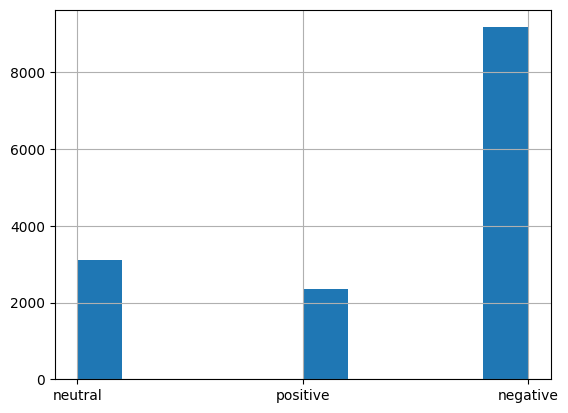

In [ ]:
df['airline_sentiment'].hist()

In [ ]:
df=df[df.airline_sentiment!='neutral'].copy()
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [ ]:
target_map={'positive':1,
            'negative':0}
df['target']=df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [ ]:
len(df)

11541

In [63]:
texts=df['text'].tolist()
predictions=classifier(texts[:200])


In [67]:
predictions

[{'label': 'POSITIVE', 'score': 0.6070870161056519},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854251742362976},
 {'label': 'POSITIVE', 'score': 0.9553211331367493},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787647724151611},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245

In [70]:
#when the label is positive the probability score is the probability for positivie class
# and when the score is negative the score is the probability for negative class
# done to calculate AUC-ROC
probs=[ d['score'] if d['label'].startswith('P') else 1-d['score'] for d in predictions]

In [71]:
probs

[0.6070870161056519,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574825763702393,
 0.9553211331367493,
 0.9827088117599487,
 0.9994851350784302,
 0.9993509650230408,
 0.9940821528434753,
 0.9863133430480957,
 0.9996304512023926,
 0.001948714256286621,
 0.9964436888694763,
 0.0031333565711975098,
 0.9787647724151611,
 0.9995218515396118,
 0.004548370838165283,
 0.9995624423027039,
 0.9998748302459717,
 0.004880666732788086,
 0.0004048943519592285,
 0.0006322264671325684,
 0.01542806625366211,
 0.01828092336654663,
 0.0004482865333557129,
 0.0023748278617858887,
 0.9934480786323547,
 0.9976067543029785,
 0.8661735653877258,
 0.0003237724304199219,
 0.8415601849555969,
 0.0032317638397216797,
 0.9997846484184265,
 0.1761462688446045,
 0.9993895292282104,
 0.09156584739685059,
 0.004861712455749512,
 0.9997820258140564,
 0.0014235973358154297,
 0.004673957824707031,
 0.00464242696762085,
 0.019041001796722412,
 0.9911696910858154,
 0.0125504732131958,
 0.00809931755065918,
 0.999

In [77]:
preds=[1 if d['label'].startswith('P') else 0 for d in predictions]
preds=np.array(preds)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,df['target'][:200])

0.925

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(preds,df['target'][:200],normalize='true')
print(cm)

[[0.92436975 0.07563025]
 [0.07407407 0.92592593]]


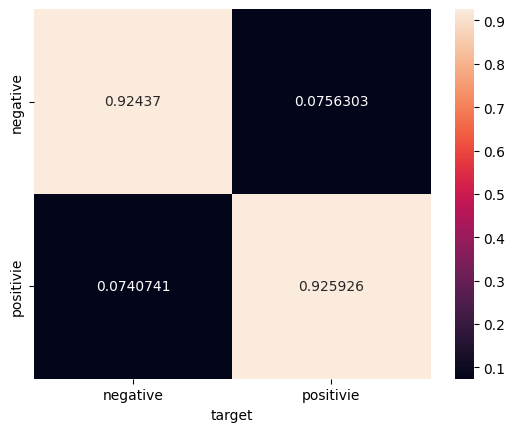

In [88]:
def plot_cm(cm):
  classes=['negative','positivie']
  df_cm=pd.DataFrame(cm,index=classes,columns=classes)
  ax=sns.heatmap(df_cm,annot=True,fmt='g')
  ax.set_xlabel('predicted')
  ax.set_xlabel('target')

plot_cm(cm)





In [89]:
f1_score(preds,df['target'][:200])

0.9090909090909091

In [92]:
roc_auc_score(preds,df['target'][:200])

0.9251478369125429